## The point of this analysis is to see how Lebrons game has changed, how he has continued to be so dominant in the league.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
sns.set()
mpl.rcParams['figure.figsize'] = [11, 5]

In [2]:
df = pd.read_csv("Lebron Data.csv")
df_s = df.head(18)
df_career = df.iloc[18]
df_teams = df.tail(3)

## Effectively we have split the given data. 
# $$ df \_s : \text{General annual seasons performance}  $$
# $$ df \_ career : \text{The given career averages or totals} $$
# $$ df \_ teams : \text{Given team averages or totals} $$

In [3]:
df.columns

Index(['Season', 'Age', 'Team', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
df_s.head()

Season   Age Team   Lg Pos     G    GS    MP    FG   FGA  ...    FT%  ORB  \
0  Apr-03  19.0  CLE  NBA  SG  79.0  79.0  39.5   7.9  18.9  ...  0.754  1.3   
1  May-04  20.0  CLE  NBA  SF  80.0  80.0  42.4   9.9  21.1  ...  0.750  1.4   
2  Jun-05  21.0  CLE  NBA  SF  79.0  79.0  42.5  11.1  23.1  ...  0.738  0.9   
3  Jul-06  22.0  CLE  NBA  SF  78.0  78.0  40.9   9.9  20.8  ...  0.698  1.1   
4  Aug-07  23.0  CLE  NBA  SF  75.0  74.0  40.4  10.6  21.9  ...  0.712  1.8   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  4.2  5.5  5.9  1.6  0.7  3.5  1.9  20.9  
1  6.0  7.4  7.2  2.2  0.7  3.3  1.8  27.2  
2  6.1  7.0  6.6  1.6  0.8  3.3  2.3  31.4  
3  5.7  6.7  6.0  1.6  0.7  3.2  2.2  27.3  
4  6.1  7.9  7.2  1.8  1.1  3.4  2.2  30.0  

[5 rows x 30 columns]

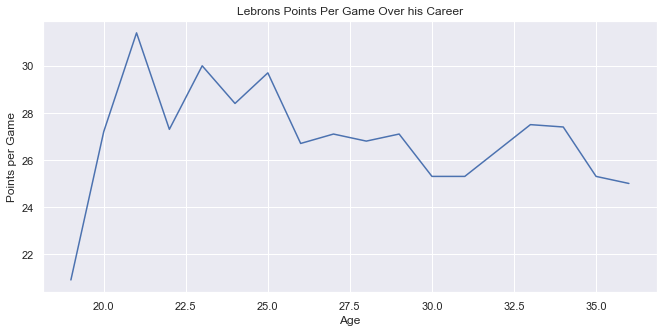

In [5]:
plt.xlabel("Age")
plt.ylabel("Points per Game")
plt.title("Lebrons Points Per Game Over his Career")
plt.plot(df_s["Age"], df_s['PTS'])

## Looking at Lebrons points, we can see that he peaked at over 30 points per game and then he slowly tapered off. So far, he still remains at around 25 points per game. What we are used to seeing is him dominate through the paint trucking past everyone. But as you get older, you'd expect him to be less explosive and not able to muscle his way through traffic. So our analysis will work around how Lebron has changed his game over the years.

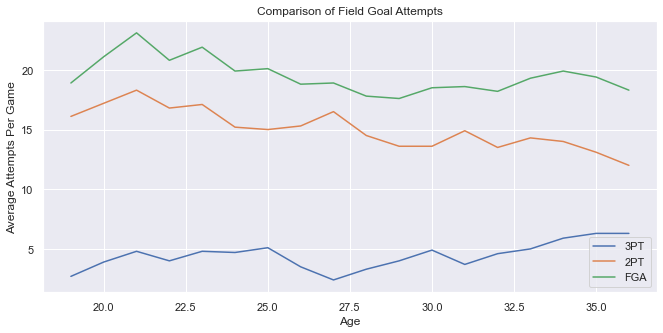

In [6]:
plt.xlabel("Age")
plt.ylabel("Average Attempts Per Game")
plt.title("Comparison of Field Goal Attempts")
plt.plot(df_s["Age"], df_s['3PA'], label="3PT")
plt.plot(df_s["Age"], df_s["2PA"], label="2PT")
plt.plot(df_s["Age"], df_s['FGA'], label="FGA")
plt.legend()

## As you can see just from a viewing perspective, Lebrons 3's attempts are steadily increasing, while his 2PT attempts are steadily decreasing. Now he's still taking a good amount of attempts, but you'd think that having so much success in the paint he'd stay there. What we are seeing now is Lebron starting to work around the perimeter more and more. 

## Now working with this current data, I want to hypothesize that LBJ takes less than 25% of his shots from beyond the arc overall including all of his season.
# Null hypothesis: $$ 3PT \geq 0.25 * FGA$$
# Alternate Hypothesis: $$3PT <0.25 * FGA$$
## With $$\alpha = 0.05 $$

In [7]:
avg_FGA = df_s["FGA"].mean()
avg_3PA = df_s["3PA"].mean()
n = df_s["Season"].count() 
s = np.std(df_s['3PA'])
f"Our average Field Goal Attempts are {avg_FGA.round(2)} and Lebrons average 3 point attempts are {avg_3PA.round(2)}"

'Our average Field Goal Attempts are 19.51 and Lebrons average 3 point attempts are 4.44'

In [8]:
f"Total number of samples is {n}"

'Total number of samples is 18'

In [9]:
t = (avg_3PA - (0.25 * avg_FGA))/(s / np.sqrt(n))
z_score = scipy.stats.norm.cdf(t, loc=0, scale=1)

In [10]:
f"Our calculated test statistic is {t}, locating the value on a Normal Distribution we find {z_score} to be our z_score"

'Our calculated test statistic is -1.719990892224297, locating the value on a Normal Distribution we find 0.04271704857603188 to be our z_score'

# Given that the test statistics is less then 0.05, we can reject the null hypothesis and declare that with 5% confidence Lebron's overall career 3 point attempts is less then 25% of his total field goal attempts. 

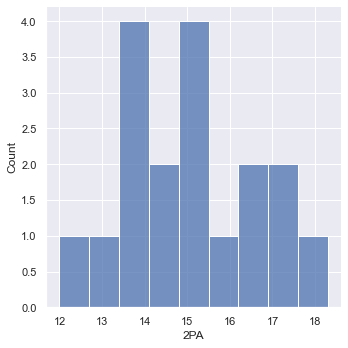

In [11]:
sns.displot(df_s['2PA'], bins=9)

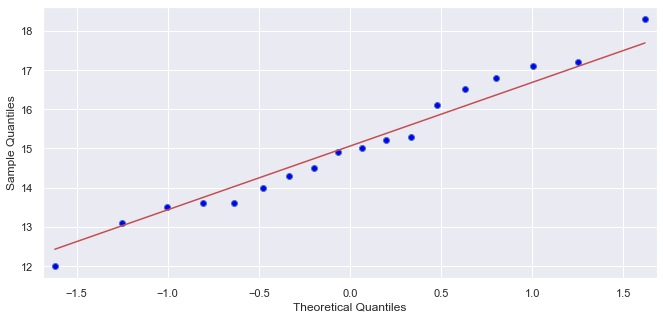

In [12]:
qqplot(df_s["2PA"], line='s')
plt.show()

## Placing the 2 point field goal attempts in a normal distribution we can see that there is a peak within the center very similar to a bell shape. On top of that the QQplot is also demonstrating a strong normal distribution. 
## Now this is strange, but reading up on Lebron's career, he was actually a perimeter player who liked to get teammates involved first. As he got older and developed further, he started to use his size to his advantage. Considering he came into the league at 240lbs, peaked up at 280lbs he definitely increased his capability to dominate in the paint. 

## As many know, he surrounded himself with 3 Point specialists to make assists from the post effectively widening his playmaking ability, but that also means he had to be a threat and score from the post as well. However, strong players such as Kevin Love, Kyle Kuzma and more were effectively reduced to 3PT specialists to effectviely maximize Lebrons vision.


## Kobe himself described Lebron's game in the video below @ 1:00
# https://www.youtube.com/watch?v=PGxETnTnZaQ&t=105s

1.1723770209838325
[0.11878225]
[5.32975576]


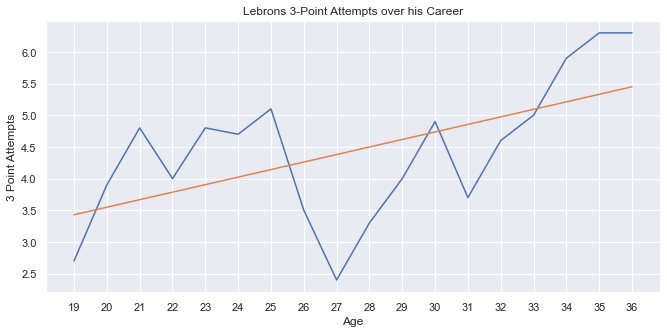

In [13]:
age = df_s["Age"].values.reshape(-1,1)
y = df_s["3PA"]
model = LinearRegression().fit(age, y)
plt.xlabel("Age")
plt.ylabel("3 Point Attempts")
plt.title("Lebrons 3-Point Attempts over his Career")
plt.locator_params(axis='x', nbins= 20)
plt.plot(age, y)
plt.plot(age, [model.intercept_ + model.coef_ * i for i in age])

print(model.intercept_)
print(model.coef_)
print(model.coef_ * 35 + model.intercept_)

In [14]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(age)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

c:\users\andrew\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    3PA   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     7.742
Date:                Sun, 13 Jun 2021   Prob (F-statistic):             0.0133
Time:                        20:12:59   Log-Likelihood:                -23.360
No. Observations:                  18   AIC:                             50.72
Df Residuals:                      16   BIC:                             52.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1724      1.195      0.981      0.341      -1.360       3.705
x1             0.1188      0.043      2.783      0.013       0.028       0.209
==============================================================================
Omnibus:                        1.562   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.319
Skew:                          -0.548   Prob(JB):                        0.517
Kurtosis:                       2.253   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Therefore the linear regression formula is:
## $$ 3PA = Age * 0.1188 + 1.1724$$

## We can tell just from the plot above of Age vs 3PA, a linear plot isn't exactly ideal considering Lebrons evolution as a player. While it may follow our idea, it isn't properly exploring Lebrons full change.
## Therefore we will try another method.

8.244934640522715


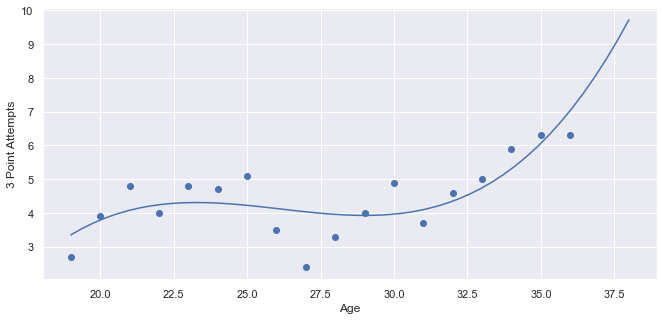

In [15]:
# New polynomial model of 3's 

mymodel = np.poly1d(np.polyfit(df_s['Age'], y, 3))
myline = np.linspace(19, 38, 50)
plt.scatter(age, y)
plt.xlabel("Age")
plt.ylabel("3 Point Attempts")
plt.plot(myline, mymodel(myline))
# print(r2_score(y, mymodel(age)))
print(mymodel(37)) # Prediction of next values

6.162581699348209


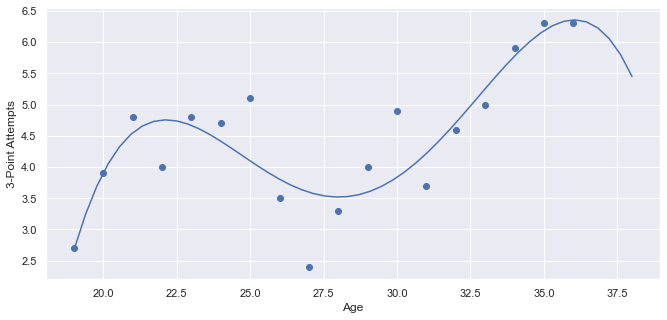

In [16]:
# New polynomial model of 3's 

mymodel2 = np.poly1d(np.polyfit(df_s['Age'], y, 4))
myline2 = np.linspace(19, 38, 50)
plt.scatter(age, y)
plt.xlabel("Age")
plt.ylabel("3-Point Attempts")
plt.plot(myline2, mymodel2(myline))
# print(r2_score(y, mymodel(age)))
print(mymodel2(37)) # Prediction of next values

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(age)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

def viz_polymonial():
    plt.scatter(age, y)
    plt.plot(age, pol_reg.predict(poly_reg.fit_transform(age)), color='blue')
    plt.title('Lebrons 3s over the Years')
    plt.xlabel('Age')
    plt.ylabel('3 Point Attempts Avg')
    plt.show()
    return
viz_polymonial()

pol_reg.predict(poly_reg.fit_transform([[37]]))

## Using 2 polynomial regressions, the main difference to note is the first plot is trying to follow a third degree polynomial while the second is a fourth degree polynomial. This drastically changes our output for predictions and gives us a sense of potentially what Lebron can do overall.

## In the degree 3 polynomial, we can see that it creates only one inflection point. This leads to the end of our regression to be upwards trending. With prediction that at age 37 Lebron will attempt 8.3 3-pointers, this could very well be possible if he continues the trend and scales further as he ages. 

## In the fourth degree polynomial regression, it predicts that Lebron will be slowly tapering off in 3's. The model is predicting that Lebron at 37 will be 6.3 which is essentially a peak to steadily drop off for the years to come. 
## This also plausible with Lebron potentially furthering his limit on minutes. We know that throughout his career he has started to stop his overall playtime with "Load Management". This can overall affect his gameplay and we will do further analysis on this. 

## Now providing a multivariable regression 

In [17]:
X = df_s[[ "Age", "3PA", "2PA", "FTA"]]
y = df_s["PTS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False )
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Age     0.279633
3PA     0.185161
2PA     0.580945
FTA     1.492921

In [18]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
14    27.5  26.056761
15    27.4  27.970968
16    25.3  24.965265
17    25.0  24.605858

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6857708486382137
Mean Squared Error: 0.6690847195460227
Root Mean Squared Error: 0.8179759895901729


## Our model basing points per game by Lebrons Age, 3 Point Attempts, 2 Point Attempts and Free Throw Attempts. We see our equation being
$$PPG = AGE * 0.279633 + 3PA * 0.185161 + 2PA * 0.580945 + FTA * 1.492921 $$

## So with every incoming season with his age increasing, depending on the amount of shots he attempts, not how many he makes we can see an expected amount. Now we can't exactly predict how many attempts he's going to take, but using the most accurate measurement would most likely be his current year in the league. 

In [20]:
regressor.predict([[37, df_s.iloc[-1]["3PA"], df_s.iloc[-1]["2PA"], df_s.iloc[-1]["FTA"]]])

array([24.88549134])

## So taking his most current year, taking his current average attempts and adding one year to his age we see his predicted point per game to be 24.88. Thats pretty good for a 37 year old man in such a demanding league!

In [21]:
# Basic method of creating the regression, includes chart for interpretation

x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

# Prob(F-statistic) is low indicating a significant accurate model. 
# A high R-Squared value, indicating a strong model with low excessive variables included. 


c:\users\andrew\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     22.37
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           9.91e-06
Time:                        20:12:59   Log-Likelihood:                -21.289
No. Observations:                  18   AIC:                             52.58
Df Residuals:                      13   BIC:                             57.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3502      6.244     -0.537      0.601     -16.839      10.138
Age            0.2983      0.092      3.243      0.006       0.100       0.497
3PA            0.2560      0.277      0.922      0.373      -0.343       0.855
2PA            0.6686      0.294      2.277      0.040       0.034       1.303
FTA            1.3886      0.216      6.428      0.000       0.922       1.855
==============================================================================
Omnibus:                        1.158   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.984
Skew:                           0.374   Prob(JB):                        0.611
Kurtosis:                       2.133   Cond. No.                         937.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Creating an efficiency rating for Lebron, we will use the NBA's basic individual rating

In [22]:
# Calculating the NBA's basic individual efficiency rating
#(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP

EFF = (df_s["PTS"] + df_s["TRB"] + df_s["AST"] + df_s["STL"] + df_s["BLK"] - (df_s["FGA"] - df_s["FG"]) - (df_s["FTA"] - df_s["FT"]) - df_s["TOV"]) / df_s["G"]

EFF

0     0.236709
1     0.352500
2     0.372152
3     0.326923
4     0.404000
5     0.379012
6     0.426316
7     0.362025
8     0.479032
9     0.425000
10    0.379221
11    0.366667
12    0.361842
13    0.414865
14    0.398780
15    0.549091
16    0.440299
17    0.620000
dtype: float64

## From a quick glance, it may seem that Lebron's efficiency slowly increased over the years. There is some imbalance and fluctuations, but generally an upward trend. Now the reason for such a drastic increase in his so called efficiency is due to the number of games this past 20-21 season. With COVID-19 reducing the number of games played to 72, Lebron playing just as he usually does is looking much sharper when taking into account hes only played 45 games in addition to his time off due to injuries this past year (Ankle).

Text(0.5, 1.0, 'Lebrons Efficiency over the Years')

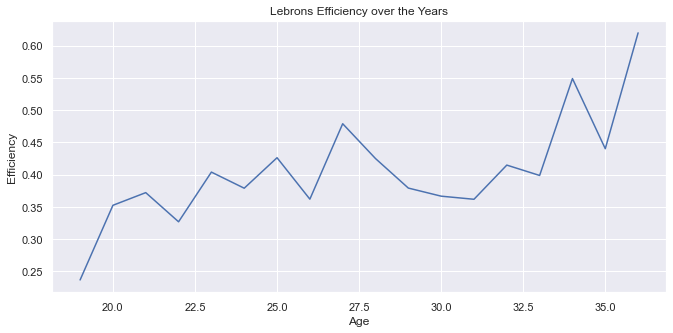

In [23]:
plt.plot(age, EFF)
plt.xlabel("Age")
plt.ylabel("Efficiency")
plt.title("Lebrons Efficiency over the Years")

## Thanks for taking the time to look over this little analysis of Lebron James. There are other statistics you could look at like Player Efficiency Rating, but that's an easy google search! This was just a combination knowledge and hobbies like statistics, programming and sports. Hopefully you enjoyed!